Импортируем необходимые библиотеки

In [1]:
import cv2 as cv
import numpy as np
import os
from IPython.display import Image

Создаем функцию сигмоиды для настройки весов

In [2]:
def sigmoid(x, der=False):
	if der:
		return x * (1 - x)
	return 1 / (1 + np.exp(-x))

Импортируем изображение осы и пчелы

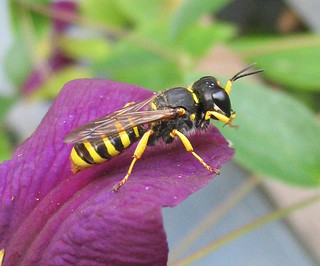

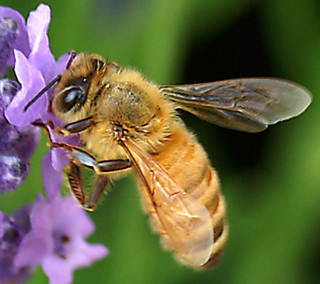

читаем изображения и сохраняем их в переменной

In [3]:
wasp = 'C:/278591_13f688b836_m.jpg'
wasp = cv.imread(wasp)
wasp = wasp / 255
wasp = cv.resize(wasp, (8, 8))
wasp_tensor = wasp.flatten()

In [4]:
bee = 'C:/1240800_e5f2b40032_n.jpg'
bee = cv.imread(bee)
bee = bee / 255
bee = cv.resize(bee, (8, 8))
bee_tensor = bee.flatten()

Изображения сохраняются в виде векторов, имеющих 192 значениz. Именно на основе этих значений мы и будем обучать нейронную сеть. 

Передаем значения тензоров в список "х" и создаем список "у" с ожидаемыми значениями

In [5]:
x = np.array([wasp_tensor, bee_tensor])

y = np.array([[0, 1]]).T

Сделаем случайные числа более определенными

In [6]:
np.random.seed(1)

Инициализируем веса случайным образом

In [7]:
syn0 = 2 * np.random.random((192, 1)) - 1

Начинаем обучение на 10000 итераций

In [8]:
syn0 = 2 * np.random.random((192, 1)) - 1

l1 = []

for iter in range(10000):
	# Прямое распространение
	l0 = x
	l1 = sigmoid(np.dot(l0, syn0))

	# Насколько мы ошиблись?
	l1_error = y - l1

	# Перемножим это с наклоном сигмоиды
	# на основе значений в l1
	l1_delta = l1_error * sigmoid(l1, True)

	# Обновим веса
	syn0 += np.dot(l0.T, l1_delta)

In [25]:
print("Выходные данные после тренеровки:")
print(l1)

Выходные данные после тренеровки:
[[0.0015254 ]
 [0.99811864]]


Как мы и задавали, на выходе ноль сооьвеьствует тензору осы (wasp), а единица - тензору пчелы (bee). Проверим обученную модель на новых фотографиях. Сначала попробуем передать тензор осы. 

In [19]:
wasp2 = 'C:/27636227_f32841ba8f_n.jpg'
wasp2 = cv.imread(wasp2)
wasp2 = wasp2 / 255
wasp2 = cv.resize(wasp2, (8, 8))
wasp2_tensor = wasp2.flatten()

In [20]:
new_one = np.array(wasp2_tensor)
l1_new = sigmoid(np.dot(new_one, syn0))
print('новые данные')
print(l1_new)

новые данные
[0.11081819]


Сеть выдала ожидаемое значение 0.1, что ближе к 0 чем к 1, соответственно она считает что на фото оса. Теперь попробуем передать фото пчелы.

In [23]:
bee2 = 'C:/161484798_32f7e59426_n.jpg'
bee2 = cv.imread(bee2)
bee2 = bee2 / 255
bee2 = cv.resize(bee2, (8, 8))
bee2_tensor = bee2.flatten()

In [24]:
new_one = np.array(bee2_tensor)
l1_new = sigmoid(np.dot(new_one, syn0))
print('новые данные')
print(l1_new)

новые данные
[0.62178472]


Получаем на выходе 0.6, что уже ближе к 1 и значит модель решила, что на фото пчела. 

Я не производил оценку точности этой модели, но вряд ли она будет высокой. Тем не менее, этот довольно простой вариант, способен предугадывать объекты на фотографии. Для большей точности нужно использовать бибилиотеку Keras и сверточные нейронные сети